In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c72eaac5-4c9f-41bf-b93f-8bad8e83bff2',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  


{'status': {'timestamp': '2025-06-07T12:26:20.307Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9715}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12210, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd
#pd.set_option('display.max_columns',None)

In [4]:
pd.json_normalize(data['status'])# make it beatiful

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2025-06-07T12:26:20.307Z,0,None,27,1,None,9715


In [5]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987552e+07,1.987552e+07,...,2.093261e+12,63.7151,2.211690e+12,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,...,3.016091e+11,9.1804,3.016091e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,131938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,...,1.545620e+11,4.7043,1.560983e+11,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,...,1.286745e+11,3.9166,2.187537e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,...,9.146572e+10,2.7839,9.146572e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN
5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.248131e+08,6.025597e+08,...,7.969450e+10,2.4258,9.150057e+10,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,28506,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.111580e+10,6.111580e+10,...,6.111442e+10,1.8602,6.111442e+10,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.495863e+11,1.495863e+11,...,2.785168e+10,0.8478,2.785168e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN
8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.485303e+10,9.485304e+10,...,2.657463e+10,0.8089,2.657464e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN
9,2010,Cardano,ADA,cardano,1529,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.534213e+10,4.499459e+10,...,2.367655e+10,0.7207,3.014659e+10,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_columns',None)

In [7]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987552e+07,1.987552e+07,False,NaN,1,NaN,NaN,None,2025-06-07T12:24:00.000Z,105318.579500,4.427154e+10,-30.2796,-0.004768,1.274240,1.421504,5.806201,31.952792,24.498493,2.093261e+12,63.7151,2.211690e+12,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,None,2025-06-07T12:25:00.000Z,2498.381759,1.484308e+10,-49.1641,-0.106943,0.805858,-1.116592,27.019976,58.446396,16.522087,3.016091e+11,9.1804,3.016091e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,131938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,None,2025-06-07T12:24:00.000Z,1.000607,6.346335e+10,-36.4558,-0.004352,0.007188,0.028113,0.044443,0.084146,0.086817,1.545620e+11,4.7043,1.560983e+11,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,None,2025-06-07T12:25:00.000Z,2.187537,1.694930e+09,-51.1578,-0.002091,1.657546,1.631822,-1.392797,12.628705,-2.403395,1.286745e+11,3.9166,2.187537e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,None,2025-06-07T12:24:00.000Z,649.212976,1.549192e+09,-25.1851,0.102745,0.261139,-1.005397,5.744162,15.550781,12.469852,9.146572e+10,2.7839,9.146572e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN
5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.248131e+08,6.025597e+08,True,NaN,6,NaN,NaN,None,2025-06-07T12:25:00.000Z,151.853124,2.448128e+09,-47.0840,-0.190124,1.175394,-1.333042,-2.034877,37.325010,11.915077,7.969450e+10,2.4258,9.150057e+10,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,28506,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.111580e+10,6.111580e+10,False,NaN,7,6.090122e+10,6.089985e+10,None,2025-06-07T12:24:00.000Z,0.999978,8.265970e+09,-43.5313,0.002531,0.008221,0.017280,-0.002143,-0.009516,0.002450,6.111442e+10,1.8602,6.111442e+10,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.495863e+11,1.495863e+11,True,NaN,8,NaN,NaN,None,2025-06-07T12:24:00.000Z,0.186191,9.603151e+08,-53.8470,-0.333264,4.553578,-1.345348,0.996587,20.174335,0.842319,2.785168e+10,0.8478,2.785168e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN
8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.485303e+10,9.485304e+10,True,NaN,9,NaN,NaN,None,2025-06-07T12:24:00.000Z,0.280166,4.063762e+08,-54.7073,0.160544,0.648642,4.097347,11.855958,18.584095,16.232005,2.657463e+10,0.8089,2.657464e+10,None,2025-06-07T12:24:00.000

In [8]:
pd.to_datetime('now')

Timestamp('2025-06-07 14:26:21.684687')

In [9]:
df = pd.json_normalize(data['data'])

In [10]:
df['timestamp'] = pd.to_datetime('now')

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987552e+07,1.987552e+07,False,NaN,1,NaN,NaN,None,2025-06-07T12:24:00.000Z,105318.579500,4.427154e+10,-30.2796,-0.004768,1.274240,1.421504,5.806201,31.952792,24.498493,2.093261e+12,63.7151,2.211690e+12,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,None,2025-06-07T12:25:00.000Z,2498.381759,1.484308e+10,-49.1641,-0.106943,0.805858,-1.116592,27.019976,58.446396,16.522087,3.016091e+11,9.1804,3.016091e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
2,825,Tether USDt,USDT,tether,131938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,None,2025-06-07T12:24:00.000Z,1.000607,6.346335e+10,-36.4558,-0.004352,0.007188,0.028113,0.044443,0.084146,0.086817,1.545620e+11,4.7043,1.560983e+11,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 14:26:22.281158
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,None,2025-06-07T12:25:00.000Z,2.187537,1.694930e+09,-51.1578,-0.002091,1.657546,1.631822,-1.392797,12.628705,-2.403395,1.286745e+11,3.9166,2.187537e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,None,2025-06-07T12:24:00.000Z,649.212976,1.549192e+09,-25.1851,0.102745,0.261139,-1.005397,5.744162,15.550781,12.469852,9.146572e+10,2.7839,9.146572e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.248131e+08,6.025597e+08,True,NaN,6,NaN,NaN,None,2025-06-07T12:25:00.000Z,151.853124,2.448128e+09,-47.0840,-0.190124,1.175394,-1.333042,-2.034877,37.325010,11.915077,7.969450e+10,2.4258,9.150057e+10,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
6,3408,USDC,USDC,usd-coin,28506,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.111580e+10,6.111580e+10,False,NaN,7,6.090122e+10,6.089985e+10,None,2025-06-07T12:24:00.000Z,0.999978,8.265970e+09,-43.5313,0.002531,0.008221,0.017280,-0.002143,-0.009516,0.002450,6.111442e+10,1.8602,6.111442e+10,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-07 14:26:22.281158
7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.495863e+11,1.495863e+11,True,NaN,8,NaN,NaN,None,2025-06-07T12:24:00.000Z,0.186191,9.603151e+08,-53.8470,-0.333264,4.553578,-1.345348,0.996587,20.174335,0.842319,2.785168e+10,0.8478,2.785168e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",Na

In [15]:
#df.append(df)
#pd.concat([df,df], ignore_index=True)
pd.concat([df,df])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987552e+07,1.987552e+07,False,NaN,1,NaN,NaN,None,2025-06-07T12:24:00.000Z,105318.579500,4.427154e+10,-30.2796,-0.004768,1.274240,1.421504,5.806201,31.952792,24.498493,2.093261e+12,63.7151,2.211690e+12,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,None,2025-06-07T12:25:00.000Z,2498.381759,1.484308e+10,-49.1641,-0.106943,0.805858,-1.116592,27.019976,58.446396,16.522087,3.016091e+11,9.1804,3.016091e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
2,825,Tether USDt,USDT,tether,131938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,None,2025-06-07T12:24:00.000Z,1.000607,6.346335e+10,-36.4558,-0.004352,0.007188,0.028113,0.044443,0.084146,0.086817,1.545620e+11,4.7043,1.560983e+11,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 14:26:22.281158
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,None,2025-06-07T12:25:00.000Z,2.187537,1.694930e+09,-51.1578,-0.002091,1.657546,1.631822,-1.392797,12.628705,-2.403395,1.286745e+11,3.9166,2.187537e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,None,2025-06-07T12:24:00.000Z,649.212976,1.549192e+09,-25.1851,0.102745,0.261139,-1.005397,5.744162,15.550781,12.469852,9.146572e+10,2.7839,9.146572e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,32196,Hyperliquid,HYPE,hyperliquid,105,2024-07-15T10:14:50.000Z,"[decentralized-exchange-dex-token, defi, deriv...",1.000000e+09,3.339282e+08,9.999939e+08,False,NaN,11,3.339317e+08,1.140299e+10,None,2025-06-07T12:26:00.000Z,34.147679,2.155237e+08,-43.8831,0.550466,-0.315169,7.226396,58.288833,178.056371,129.751527,1.140287e+10,0.3471,3.414768e+10,None,2025-06-07T12:26:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-06-07 14:27:24.468235
11,20947,Sui,SUI,sui,672,2022-07-12T08:03:11.000Z,"[binance-launchpool, coinbase-ventures-portfol...",1.000000e+10,3.396671e+09,1.000000e+10,False,NaN,12,3.396671e+09,1.112517e+10,None,2025-06-07T12:25:00.000Z,3.275317,8.681759e+08,-32.4695,-0.042424,5.872975,3.720581,-13.648119,58.978840,34.896138,1.112517e+10,0.3386,3.275317e+10,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:27:24.468235
12,1975,Chainlink,LINK,chainlink,2020,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, eth...",NaN,6.571000e+08,1.000000e+09,False,NaN,13,NaN,NaN,None,2025-06-07T12:26:00.000Z,14.016179,3.176889e+08,-31.4329,-0.201117,5.952792,1.857851,-6.289295,19.829572,-4.318732,9.2100

In [16]:
def  api_runner():

  global df

  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'c72eaac5-4c9f-41bf-b93f-8bad8e83bff2',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  #df= df.append(df2)
  df = pd.concat([df,df2])  
  

In [17]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner complete successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2025-06-07T12:27:59.825Z', 'error_code': 0, 'error_message': None, 'elapsed': 13, 'credit_count': 1, 'notice': None, 'total_count': 9715}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12210, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987552e+07,1.987552e+07,False,NaN,1,NaN,NaN,None,2025-06-07T12:24:00.000Z,105318.579500,4.427154e+10,-30.2796,-0.004768,1.274240,1.421504,5.806201,31.952792,24.498493,2.093261e+12,63.7151,2.211690e+12,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,None,2025-06-07T12:25:00.000Z,2498.381759,1.484308e+10,-49.1641,-0.106943,0.805858,-1.116592,27.019976,58.446396,16.522087,3.016091e+11,9.1804,3.016091e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
2,825,Tether USDt,USDT,tether,131938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,None,2025-06-07T12:24:00.000Z,1.000607,6.346335e+10,-36.4558,-0.004352,0.007188,0.028113,0.044443,0.084146,0.086817,1.545620e+11,4.7043,1.560983e+11,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 14:26:22.281158
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,None,2025-06-07T12:25:00.000Z,2.187537,1.694930e+09,-51.1578,-0.002091,1.657546,1.631822,-1.392797,12.628705,-2.403395,1.286745e+11,3.9166,2.187537e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,None,2025-06-07T12:24:00.000Z,649.212976,1.549192e+09,-25.1851,0.102745,0.261139,-1.005397,5.744162,15.550781,12.469852,9.146572e+10,2.7839,9.146572e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,32196,Hyperliquid,HYPE,hyperliquid,105,2024-07-15T10:14:50.000Z,"[decentralized-exchange-dex-token, defi, deriv...",1.000000e+09,3.339282e+08,9.999939e+08,False,NaN,11,3.339317e+08,1.142585e+10,None,2025-06-07T12:33:00.000Z,34.216139,2.157711e+08,-44.0128,0.701596,-0.386487,7.761839,58.321726,178.933627,132.150285,1.142573e+10,0.3476,3.421614e+10,None,2025-06-07T12:33:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-06-07 14:34:06.356632
11,20947,Sui,SUI,sui,672,2022-07-12T08:03:11.000Z,"[binance-launchpool, coinbase-ventures-portfol...",1.000000e+10,3.396671e+09,1.000000e+10,False,NaN,12,3.396671e+09,1.113457e+10,None,2025-06-07T12:32:00.000Z,3.278084,8.596163e+08,-33.6713,0.200225,5.237603,3.912007,-13.762832,59.461160,35.065142,1.113457e+10,0.3387,3.278084e+10,None,2025-06-07T12:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:34:06.356632
12,1975,Chainlink,LINK,chainlink,2020,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, eth...",NaN,6.571000e+08,1.000000e+09,False,NaN,13,NaN,NaN,None,2025-06-07T12:33:00.000Z,14.021324,3.138449e+08,-32.7470,-0.226144,5.632271,1.889378,-6.261386,19.807301,-4.100419,9.21341

In [21]:
pd.set_option('display.max_rows',None)

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987552e+07,1.987552e+07,False,NaN,1,NaN,NaN,None,2025-06-07T12:24:00.000Z,105318.579500,4.427154e+10,-30.2796,-0.004768,1.274240,1.421504,5.806201,31.952792,24.498493,2.093261e+12,63.7151,2.211690e+12,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,None,2025-06-07T12:25:00.000Z,2498.381759,1.484308e+10,-49.1641,-0.106943,0.805858,-1.116592,27.019976,58.446396,16.522087,3.016091e+11,9.1804,3.016091e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
2,825,Tether USDt,USDT,tether,131938,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,None,2025-06-07T12:24:00.000Z,1.000607,6.346335e+10,-36.4558,-0.004352,0.007188,0.028113,0.044443,0.084146,0.086817,1.545620e+11,4.7043,1.560983e+11,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 14:26:22.281158
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,None,2025-06-07T12:25:00.000Z,2.187537,1.694930e+09,-51.1578,-0.002091,1.657546,1.631822,-1.392797,12.628705,-2.403395,1.286745e+11,3.9166,2.187537e+11,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,None,2025-06-07T12:24:00.000Z,649.212976,1.549192e+09,-25.1851,0.102745,0.261139,-1.005397,5.744162,15.550781,12.469852,9.146572e+10,2.7839,9.146572e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.248131e+08,6.025597e+08,True,NaN,6,NaN,NaN,None,2025-06-07T12:25:00.000Z,151.853124,2.448128e+09,-47.0840,-0.190124,1.175394,-1.333042,-2.034877,37.325010,11.915077,7.969450e+10,2.4258,9.150057e+10,None,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
6,3408,USDC,USDC,usd-coin,28506,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.111580e+10,6.111580e+10,False,NaN,7,6.090122e+10,6.089985e+10,None,2025-06-07T12:24:00.000Z,0.999978,8.265970e+09,-43.5313,0.002531,0.008221,0.017280,-0.002143,-0.009516,0.002450,6.111442e+10,1.8602,6.111442e+10,None,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-07 14:26:22.281158
7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.495863e+11,1.495863e+11,True,NaN,8,NaN,NaN,None,2025-06-07T12:24:00.000Z,0.186191,9.603151e+08,-53.8470,-0.333264,4.553578,-1.345348,0.996587,20.174335,0.842319,2.785168e+10,0.8478,2.785168e+10,None,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",Na

In [29]:
def  api_runner():

  global df

  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'c72eaac5-4c9f-41bf-b93f-8bad8e83bff2',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  df = pd.json_normalize(data['data'])
  df['timestamp'] = pd.to_datetime('now')
  #df= df.append(df2)
  df  

if not os.path.isfile(r'/Users/jinyichen/Downloads/Test_python/API.csv'):
    df.to_csv(r'/Users/jinyichen/Downloads/Test_python/API.csv',header = 'column_names')
else:
    df.to_csv(r'/Users/jinyichen/Downloads/Test_python/API.csv',mode= 'a',header = False)

In [27]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner complete successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2025-06-07T13:06:22.792Z', 'error_code': 0, 'error_message': None, 'elapsed': 62, 'credit_count': 1, 'notice': None, 'total_count': 9714}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12210, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [30]:
df72 = pd.read_csv(r'/Users/jinyichen/Downloads/Test_python/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.987552e+07,1.987552e+07,False,NaN,1,NaN,NaN,NaN,2025-06-07T12:24:00.000Z,105318.579500,4.427154e+10,-30.2796,-0.004768,1.274240,1.421504,5.806201,31.952792,24.498493,2.093261e+12,63.7151,2.211690e+12,NaN,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
1,1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207218e+08,1.207218e+08,True,NaN,2,NaN,NaN,NaN,2025-06-07T12:25:00.000Z,2498.381759,1.484308e+10,-49.1641,-0.106943,0.805858,-1.116592,27.019976,58.446396,16.522087,3.016091e+11,9.1804,3.016091e+11,NaN,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
2,2,825,Tether USDt,USDT,tether,131938,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.544683e+11,1.560037e+11,True,NaN,3,NaN,NaN,NaN,2025-06-07T12:24:00.000Z,1.000607,6.346335e+10,-36.4558,-0.004352,0.007188,0.028113,0.044443,0.084146,0.086817,1.545620e+11,4.7043,1.560983e+11,NaN,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 14:26:22.281158
3,3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.882165e+10,9.998606e+10,False,NaN,4,NaN,NaN,NaN,2025-06-07T12:25:00.000Z,2.187537,1.694930e+09,-51.1578,-0.002091,1.657546,1.631822,-1.392797,12.628705,-2.403395,1.286745e+11,3.9166,2.187537e+11,NaN,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
4,4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408871e+08,1.408871e+08,False,NaN,5,NaN,NaN,NaN,2025-06-07T12:24:00.000Z,649.212976,1.549192e+09,-25.1851,0.102745,0.261139,-1.005397,5.744162,15.550781,12.469852,9.146572e+10,2.7839,9.146572e+10,NaN,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
5,5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.248131e+08,6.025597e+08,True,NaN,6,NaN,NaN,NaN,2025-06-07T12:25:00.000Z,151.853124,2.448128e+09,-47.0840,-0.190124,1.175394,-1.333042,-2.034877,37.325010,11.915077,7.969450e+10,2.4258,9.150057e+10,NaN,2025-06-07T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
6,6,3408,USDC,USDC,usd-coin,28506,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.111580e+10,6.111580e+10,False,NaN,7,6.090122e+10,6.089985e+10,NaN,2025-06-07T12:24:00.000Z,0.999978,8.265970e+09,-43.5313,0.002531,0.008221,0.017280,-0.002143,-0.009516,0.002450,6.111442e+10,1.8602,6.111442e+10,NaN,2025-06-07T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-07 14:26:22.281158
7,7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.495863e+11,1.495863e+11,True,NaN,8,NaN,NaN,NaN,2025-06-07T12:24:00.000Z,0.186191,9.603151e+08,-53.8470,-0.333264,4.553578,-1.345348,0.996587,20.174335,0.842319,2.785168e+10,0.8478,2.785168e+10,NaN,2025-06-07T12:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 14:26:22.281158
8,8,1958,TRON,TRX,tron,1183,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 

In [33]:
pd.set_option('display.float_format',lambda x : '%.5f' % x)

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12210,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19875540.00000,19875540.00000,False,NaN,1,NaN,NaN,None,2025-06-07T13:07:00.000Z,105405.86895,42823339903.29762,-31.88900,0.10062,1.33777,1.18483,6.12596,32.02377,24.66362,2094998564628.51245,63.71370,2213523248032.43994,None,2025-06-07T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 15:09:24.332546
1,1027,Ethereum,ETH,ethereum,10331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120721763.35783,120721763.35783,True,NaN,2,NaN,NaN,None,2025-06-07T13:08:00.000Z,2494.99344,13276724049.23360,-53.48480,-0.06175,0.53816,-1.94062,26.81533,58.97291,16.66795,301200007381.92865,9.16020,301200007381.92999,None,2025-06-07T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 15:09:24.332546
2,825,Tether USDt,USDT,tether,131941,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,154468336092.38300,156003724992.80667,True,NaN,3,NaN,NaN,None,2025-06-07T13:07:00.000Z,1.00051,62038924163.16879,-38.37570,-0.00622,-0.01608,0.01824,0.03238,0.07001,0.07058,154547549860.13382,4.70090,156083726131.89001,None,2025-06-07T13:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-07 15:09:24.332546
3,52,XRP,XRP,xrp,1623,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58821652442.00000,99986060343.00000,False,NaN,4,NaN,NaN,None,2025-06-07T13:08:00.000Z,2.18540,1595270638.65688,-54.60490,-0.07160,1.07787,0.83786,-1.14179,11.90907,-2.31236,128549063178.83762,3.90950,218540380696.70001,None,2025-06-07T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 15:09:24.332546
4,1839,BNB,BNB,bnb,2566,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140887076.62000,140887076.62000,False,NaN,5,NaN,NaN,None,2025-06-07T13:07:00.000Z,649.37442,1526267037.57829,-26.52040,0.07934,-0.00832,-1.39472,5.71017,15.06822,12.32827,91488463589.51237,2.78280,91488463589.50999,None,2025-06-07T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 15:09:24.332546
5,5426,Solana,SOL,solana,933,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,524812923.22095,602559665.68998,True,NaN,6,NaN,NaN,None,2025-06-07T13:08:00.000Z,151.76921,2287079986.19729,-51.63530,0.02834,0.26858,-2.55994,-2.01951,37.39662,12.22457,79650440419.21094,2.42240,91450001757.78000,None,2025-06-07T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-07 15:09:24.332546
6,3408,USDC,USDC,usd-coin,28506,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61115485796.38183,61115485796.38183,False,NaN,7,60901219650.23100,60893045057.27254,None,2025-06-07T13:07:00.000Z,0.99987,8003313056.85243,-45.77000,-0.00438,-0.01419,-0.00034,-0.01164,-0.03108,-0.00766,61107282443.10395,1.85840,61107282443.10000,None,2025-06-07T13:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-07 15:09:24.332546
7,74,Dogecoin,DOGE,dogecoin,1234,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,149586636383.70526,149586636383.70526,True,NaN,8,NaN,NaN,None,2025-06-07T13:07:00.000Z,0.18647,914797251.81249,-56.74300,0.08156,4.64779,-3.44476,1.18727,21.21304,1.02234,27892817813.88323,0.84830,27892817813.88000,Non

In [38]:
df3=df.groupby('name',sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 #average value 

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10062,1.33777,1.18483,6.12596,32.02377,24.66362
Ethereum,-0.06175,0.53816,-1.94062,26.81533,58.97291,16.66795
Tether USDt,-0.00622,-0.01608,0.01824,0.03238,0.07001,0.07058
XRP,-0.07160,1.07787,0.83786,-1.14179,11.90907,-2.31236
BNB,0.07934,-0.00832,-1.39472,5.71017,15.06822,12.32827
Solana,0.02834,0.26858,-2.55994,-2.01951,37.39662,12.22457
USDC,-0.00438,-0.01419,-0.00034,-0.01164,-0.03108,-0.00766
Dogecoin,0.08156,4.64779,-3.44476,1.18727,21.21304,1.02234
TRON,-0.31993,0.18807,3.82826,11.51022,18.17853,15.35567


In [39]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.10062
              quote.USD.percent_change_24h     1.33777
              quote.USD.percent_change_7d      1.18483
              quote.USD.percent_change_30d     6.12596
              quote.USD.percent_change_60d    32.02377
              quote.USD.percent_change_90d    24.66362
Ethereum      quote.USD.percent_change_1h     -0.06175
              quote.USD.percent_change_24h     0.53816
              quote.USD.percent_change_7d     -1.94062
              quote.USD.percent_change_30d    26.81533
              quote.USD.percent_change_60d    58.97291
              quote.USD.percent_change_90d    16.66795
Tether USDt   quote.USD.percent_change_1h     -0.00622
              quote.USD.percent_change_24h    -0.01608
              quote.USD.percent_change_7d      0.01824
              quote.USD.percent_change_30d     0.03238
              quote.USD.percent_change_60d     0.07001
              quote.US

In [40]:
type(df3)

pandas.core.frame.DataFrame

In [41]:
type(df4) # not a data frame but a series

pandas.core.series.Series

In [43]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.10062
             quote.USD.percent_change_24h   1.33777
             quote.USD.percent_change_7d    1.18483
             quote.USD.percent_change_30d   6.12596
             quote.USD.percent_change_60d  32.02377
             quote.USD.percent_change_90d  24.66362
Ethereum     quote.USD.percent_change_1h   -0.06175
             quote.USD.percent_change_24h   0.53816
             quote.USD.percent_change_7d   -1.94062
             quote.USD.percent_change_30d  26.81533
             quote.USD.percent_change_60d  58.97291
             quote.USD.percent_change_90d  16.66795
Tether USDt  quote.USD.percent_change_1h   -0.00622
             quote.USD.percent_change_24h  -0.01608
             quote.USD.percent_change_7d    0.01824
             quote.USD.percent_change_30d   0.03238
             quote.USD.percent_change_60d   0.07001
             quote.USD.percent_change_90d   0.07058
XRP          quote.USD.percent_change_1h   -0.07160
             quote.USD.percent_change_24h   1.07787
             quote.USD.percent_change_7d    0.83786
             quote.USD.percent_change_30d  -1.14179
             quote.USD.percent_change_60d  11.90907
             quote.USD.percent_change_90d  -2.31236
BNB          quote.USD.percent_change_1h    0.07934
             quote.USD.percent_change_24h  -0.00832
             quote.USD.percent_change_7d   -1.39472
             quote.USD.percent_change_30d   5.71017
             quote.USD.percent_change_60d  15.06822
             quote.USD.percent_change_90d  12.32827
Solana       quote.USD.percent_change_1h    0.02834
             quote.USD.percent_change_24h   0.26858
             quote.USD.percent_change_7d   -2.55994
             quote.USD.percent_change_30d  -2.01951
             quote.USD.percent_change_60d  37.39662
             quote.USD.percent_change_90d  12.22457
USDC         quote.USD.percent_change_1h   -0.00438
             quote.USD.percent_change_24h  -0.01419
             quote.USD.percent_change_7d   -0.00034
             quote.USD.percent_change_30d  -0.01164
             quote.USD.percent_change_60d  -0.03108
             quote.USD.percent_change_90d  -0.00766
Dogecoin     quote.USD.percent_change_1h    0.08156
             quote.USD.percent_change_24h   4.64779
             quote.USD.percent_change_7d   -3.44476
             quote.USD.percent_change_30d   1.18727
             quote.USD.percent_change_60d  21.21304
             quote.USD.percent_change_90d   1.02234
TRON         quote.USD.percent_change_1h   -0.31993
             quote.USD.percent_change_24h   0.18807
             quote.USD.percent_change_7d    3.82826
             quote.USD.percent_change_30d  11.51022
             quote.USD.percent_change_60d  18.17853
             quote.USD.percent_change_90d  15.35567
Cardano      quote.USD.percent_change_1h   -0.26697
             quote.USD.percent_change_24h   1.33595
             quote.USD.percent_change_7d   -1.52786
             quote.USD.percent_change_30d  -7.41272
             quote.USD.percent_change_60d  10.66026
             quote.USD.percent_change_90d -14.06990
Hyperliquid  quote.USD.percent_change_1h    0.47203
             quote.USD.percent_change_24h  -2.25956
             quote.USD.percent_change_7d    4.87422
             quote.USD.percent_change_30d  58.25442
             quote.USD.percent_change_60d 178.01087
             quote.USD.percent_change_90d 130.86061
Sui          quote.USD.percent_change_1h   -0.02344
             quote.USD.percent_change_24h   3.41595
             quote.USD.percent_change_7d    2.14368
             quote.USD.percent_change_30d -13.67843
             quote.USD.percent_change_60d  59.27084
             quote.USD.percent_change_90d  35.04954
Chainlink    quote.USD.percent_change_1h   -0.05104
             quote.USD.percent_change_24h   5.61962
             quote.USD.percent_change_7d    0.28390
             quote.USD.percent_change_30d

In [46]:
type(df5)

pandas.core.frame.DataFrame

In [47]:
df5.count()

values    90
dtype: int64

In [49]:
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,0.10062
1,1.33777
2,1.18483
3,6.12596
4,32.02377
5,24.66362
6,-0.06175
7,0.53816
8,-1.94062
9,26.81533


In [51]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10062
1,Bitcoin,quote.USD.percent_change_24h,1.33777
2,Bitcoin,quote.USD.percent_change_7d,1.18483
3,Bitcoin,quote.USD.percent_change_30d,6.12596
4,Bitcoin,quote.USD.percent_change_60d,32.02377
5,Bitcoin,quote.USD.percent_change_90d,24.66362
6,Ethereum,quote.USD.percent_change_1h,-0.06175
7,Ethereum,quote.USD.percent_change_24h,0.53816
8,Ethereum,quote.USD.percent_change_7d,-1.94062
9,Ethereum,quote.USD.percent_change_30d,26.81533


In [52]:
df7 = df6.rename(columns= {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10062
1,Bitcoin,quote.USD.percent_change_24h,1.33777
2,Bitcoin,quote.USD.percent_change_7d,1.18483
3,Bitcoin,quote.USD.percent_change_30d,6.12596
4,Bitcoin,quote.USD.percent_change_60d,32.02377
5,Bitcoin,quote.USD.percent_change_90d,24.66362
6,Ethereum,quote.USD.percent_change_1h,-0.06175
7,Ethereum,quote.USD.percent_change_24h,0.53816
8,Ethereum,quote.USD.percent_change_7d,-1.94062
9,Ethereum,quote.USD.percent_change_30d,26.81533


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])

df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.10062
1,Bitcoin,24h,1.33777
2,Bitcoin,7d,1.18483
3,Bitcoin,30d,6.12596
4,Bitcoin,60d,32.02377
5,Bitcoin,90d,24.66362
6,Ethereum,1h,-0.06175
7,Ethereum,24h,0.53816
8,Ethereum,7d,-1.94062
9,Ethereum,30d,26.81533


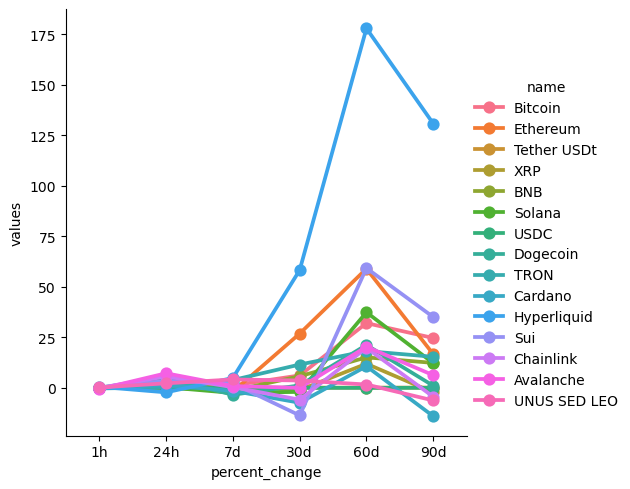

In [59]:
sns.catplot(x='percent_change', y = 'values',hue = 'name',data= df7,kind = 'point')

In [63]:
df10= df72[['name','quote.USD.price','timestamp']]
df10= df10.query("name =='Bitcoin' ")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,105318.57950,2025-06-07 14:26:22.281158
15,Bitcoin,105318.57950,2025-06-07 14:26:24.146061
30,Bitcoin,105327.02945,2025-06-07 14:27:24.468235
45,Bitcoin,105327.02945,2025-06-07 14:27:59.859468
60,Bitcoin,105343.27491,2025-06-07 14:29:00.484567
75,Bitcoin,105345.31137,2025-06-07 14:30:02.654486
90,Bitcoin,105355.49138,2025-06-07 14:31:03.261159
105,Bitcoin,105356.04474,2025-06-07 14:32:04.190921
120,Bitcoin,105349.12983,2025-06-07 14:33:05.659849
135,Bitcoin,105368.72934,2025-06-07 14:34:06.356632


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

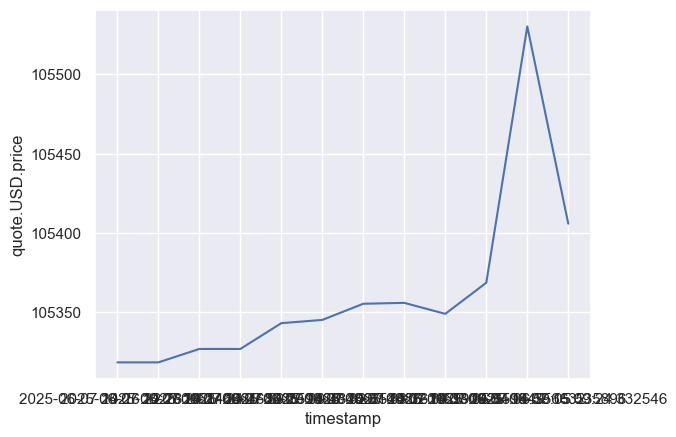

In [65]:
sns.set_theme(style ="darkgrid")
sns.lineplot(x= 'timestamp', y = 'quote.USD.price',data= df10)